In [65]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft
from sklearn.preprocessing import scale
import pandas as pd

In [68]:
#Decibels on the y-axis
#Frequency Hz on the x-axis

def get_wav(filename, scaling=1.0):
    """ return arrays of time and sound amplitude """
    
    sampFreq, snd = wavfile.read(filename)

    snd = snd / (2.**15) #convert sound array to float pt. values
    snd = scale(snd, with_mean=True, with_std=False, copy=True)
    snd *= scaling
    
    N = len(snd)
    T = np.arange(0,N)/sampFreq
    
    return pd.DataFrame({'T':T, 'A':snd})

def get_fft(filename, scaling=1.0):
    """ return arrays of frequencies and powers """
    sampFreq, snd = wavfile.read(filename)

    snd = snd / (2.**15) #convert sound array to float pt. values
    snd = scale(snd, with_mean=True, with_std=False, copy=True)
    snd *= scaling

    N = len(snd)
    pwr = fft(snd) # take the fourier transform

    nUniquePts = int(np.ceil((N+1)/2.0))
    pwr = pwr[0:nUniquePts]
    pwr = np.abs(pwr)

    pwr = pwr/N # scale by the number of points so that
                 # the magnitude does not depend on the length 
                 # of the signal or on its sampling frequency  
    pwr = 2*np.power(pwr,2)  # square it to get the power 

    # multiply by two (see technical document for details)
    # odd nfft excludes Nyquist point
    if N % 2 > 0: # we've got odd number of points fft
        pwr[1:len(pwr)] = pwr[1:len(pwr)] * 2
    else:
        pwr[1:len(pwr) -1] = pwr[1:len(pwr) - 1] * 2 # we've got even number of points fft

    freqs = np.arange(0, nUniquePts, 1.0) * (sampFreq/N)
    
    return pd.DataFrame({'F':freqs, 'P':pwr})

#### Microphone at rotary valve

<IPython.core.display.Javascript object>


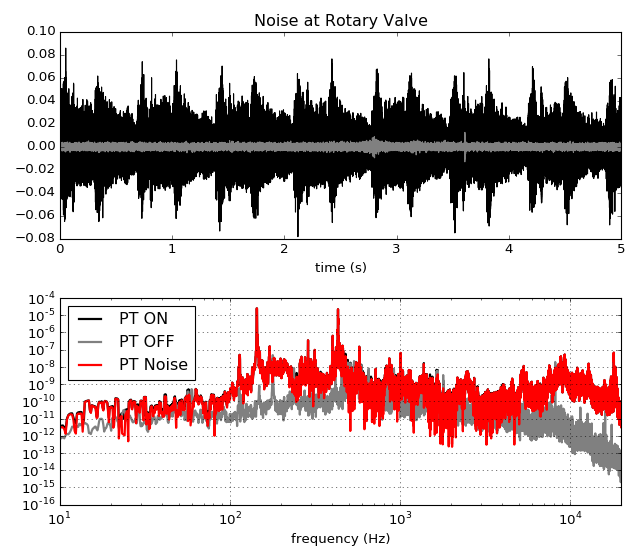

In [43]:
wavname = 'rotary_valve'
avgs = 5

fig, ax = plt.subplots(2,1, figsize=(8,7))

wav = get_wav(wavname+'_unfiltered.wav')
ft = get_fft(wavname+'_unfiltered.wav')
ft = ft.rolling(window=avgs,center=True).mean()
# ind_norm = np.abs(ft['F']-144.0).argmin()
# norm = ft['P'][ind_norm]
# ft['P'] *= 1/norm

ax[0].plot(wav['T'], wav['A'], lw=1, color='k',label = 'PT ON')
ax[1].plot(ft['F'], ft['P'], lw=2, color='k', label = 'PT ON')

wav = get_wav(wavname+'_unfiltered_pt_off.wav')
ft_off = get_fft(wavname+'_unfiltered_pt_off.wav')
ft_off = ft_off.rolling(window=avgs,center=True).mean()
# ft_off['P'] *= 1/norm

ax[0].plot(wav['T'], wav['A'], lw=1, color='gray', label = 'PT OFF')
ax[1].plot(ft_off['F'], ft_off['P'], lw=2, color='gray', label = 'PT OFF')

dft = ft
dft['P'] += -ft_off['P']
dft = dft[dft['P']>0]
ax[1].plot(dft['F'], dft['P'], color='r', lw=2, label='PT Noise')

ax[0].set_xlabel('time (s)')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(10, 20e3)
ax[1].grid()
ax[1].legend(loc='upper left')
ax[1].set_xlabel('frequency (Hz)')
ax[0].set_title('Noise at Rotary Valve')
fig.tight_layout()

#### Microphone at balast

<IPython.core.display.Javascript object>


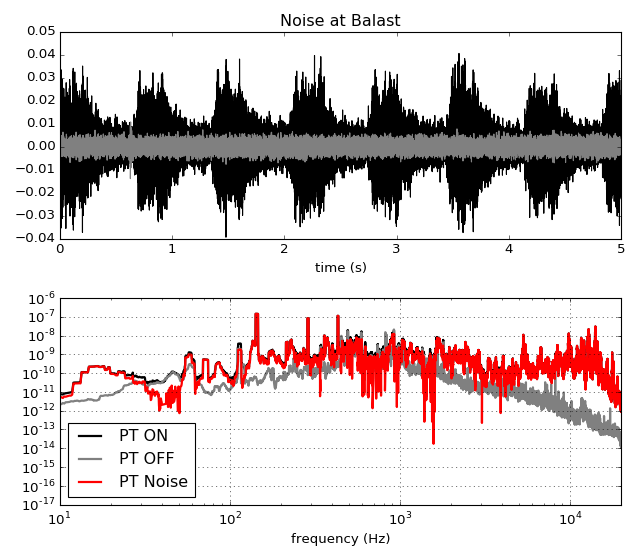

In [40]:
wavname = 'balast'
avgs = 25

fig, ax = plt.subplots(2,1, figsize=(8,7))

wav = get_wav(wavname+'_unfiltered.wav')
ft = get_fft(wavname+'_unfiltered.wav')
ft = ft.rolling(window=avgs,center=True).mean()
# ind_norm = np.abs(ft['F']-144.0).argmin()
# norm = ft['P'][ind_norm]
# ft['P'] *= 1/norm

ax[0].plot(wav['T'], wav['A'], lw=1, color='k',label = 'PT ON')
ax[1].plot(ft['F'], ft['P'], lw=2, color='k', label = 'PT ON')

wav = get_wav(wavname+'_unfiltered_pt_off.wav')
ft_off = get_fft(wavname+'_unfiltered_pt_off.wav')
ft_off = ft_off.rolling(window=avgs,center=True).mean()
# ft_off['P'] *= 1/norm

ax[0].plot(wav['T'], wav['A'], lw=1, color='gray', label = 'PT OFF')
ax[1].plot(ft_off['F'], ft_off['P'], lw=2, color='gray', label = 'PT OFF')

dft = ft
dft['P'] += -ft_off['P']
dft = dft[dft['P']>0]
ax[1].plot(dft['F'], dft['P'], color='r', lw=2, label='PT Noise')

ax[0].set_xlabel('time (s)')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(10, 20e3)
ax[1].grid()
ax[1].legend(loc='lower left')
ax[1].set_xlabel('frequency (Hz)')
ax[0].set_title('Noise at Balast')
fig.tight_layout()

#### Microphone at top of pulse tube

<IPython.core.display.Javascript object>


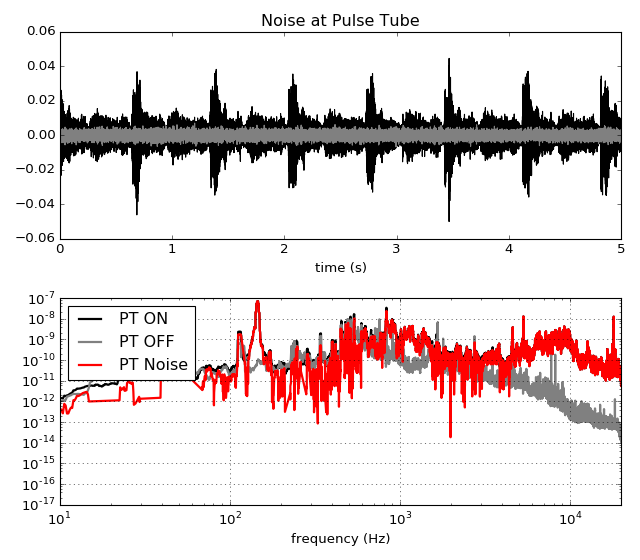

In [36]:
wavname = 'pt_top'
avgs = 25

fig, ax = plt.subplots(2,1, figsize=(8,7))

wav = get_wav(wavname+'_unfiltered.wav')
ft = get_fft(wavname+'_unfiltered.wav')
ft = ft.rolling(window=avgs,center=True).mean()
# ind_norm = np.abs(ft['F']-144.0).argmin()
# norm = ft['P'][ind_norm]
# ft['P'] *= 1/norm

ax[0].plot(wav['T'], wav['A'], lw=1, color='k',label = 'PT ON')
ax[1].plot(ft['F'], ft['P'], lw=2, color='k', label = 'PT ON')

wav = get_wav(wavname+'_unfiltered_pt_off.wav')
ft_off = get_fft(wavname+'_unfiltered_pt_off.wav')
ft_off = ft_off.rolling(window=avgs,center=True).mean()
# ft_off['P'] *= 1/norm

ax[0].plot(wav['T'], wav['A'], lw=1, color='gray', label = 'PT OFF')
ax[1].plot(ft_off['F'], ft_off['P'], lw=2, color='gray', label = 'PT OFF')

dft = ft
dft['P'] += -ft_off['P']
dft = dft[dft['P']>0]
ax[1].plot(dft['F'], dft['P'], color='r', lw=2, label='PT Noise')

ax[0].set_xlabel('time (s)')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(10, 20e3)
ax[1].grid()
ax[1].legend(loc='upper left')
ax[1].set_xlabel('frequency (Hz)')
ax[0].set_title('Noise at Pulse Tube')
fig.tight_layout()

#### Microphone at top of control rack

<IPython.core.display.Javascript object>


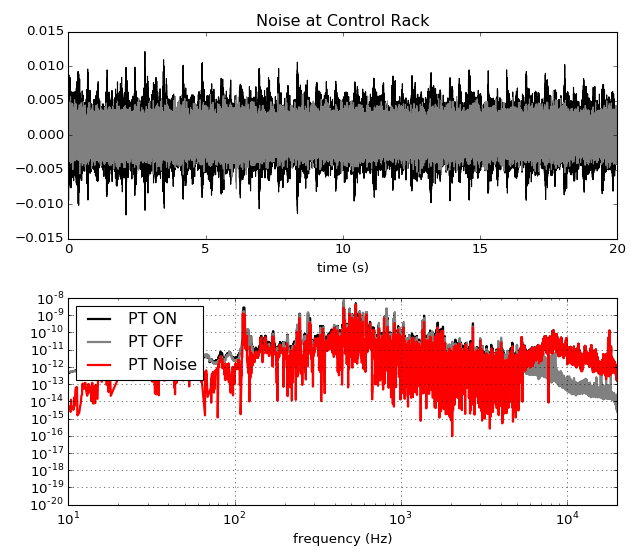

In [35]:
wavname = 'control_rack'
avgs = 50

fig, ax = plt.subplots(2,1, figsize=(8,7))

wav = get_wav(wavname+'_unfiltered.wav')
ft = get_fft(wavname+'_unfiltered.wav')
ft = ft.rolling(window=avgs,center=True).mean()
# ind_norm = np.abs(ft['F']-144.0).argmin()
# norm = ft['P'][ind_norm]
# ft['P'] *= 1/norm

ax[0].plot(wav['T'], wav['A'], lw=1, color='k',label = 'PT ON')
ax[1].plot(ft['F'], ft['P'], lw=2, color='k', label = 'PT ON')

wav = get_wav(wavname+'_unfiltered_pt_off.wav')
ft_off = get_fft(wavname+'_unfiltered_pt_off.wav')
ft_off = ft_off.rolling(window=avgs,center=True).mean()
# ft_off['P'] *= 1/norm

ax[0].plot(wav['T'], wav['A'], lw=1, color='gray', label = 'PT OFF')
ax[1].plot(ft_off['F'], ft_off['P'], lw=2, color='gray', label = 'PT OFF')

dft = ft
dft['P'] += -ft_off['P']
dft = dft[dft['P']>0]
ax[1].plot(dft['F'], dft['P'], color='r', lw=2, label='PT Noise')

ax[0].set_xlabel('time (s)')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(10, 20e3)
ax[1].grid()
ax[1].legend(loc='upper left')
ax[1].set_xlabel('frequency (Hz)')
ax[0].set_title('Noise at Control Rack')
fig.tight_layout()

### Summary

Plot all the red curves on top of one another. Normalize data sets such that the standard deviation of the noise with the pulse tube off is the same over each data set.

<IPython.core.display.Javascript object>


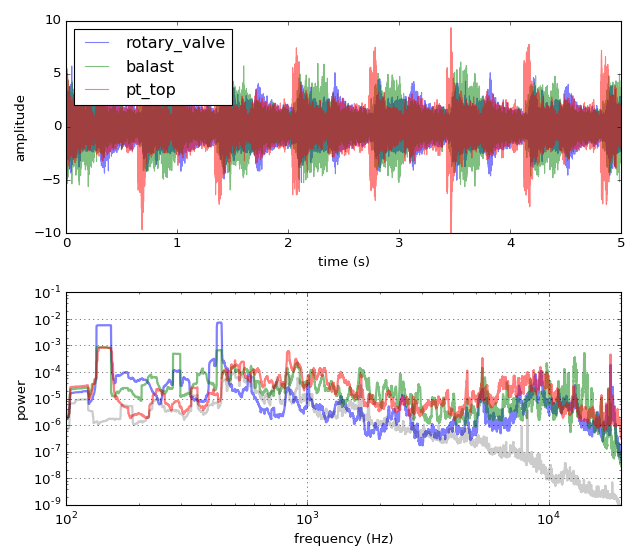

In [124]:
from sklearn.preprocessing import scale

# data_sets = ['rotary_valve', 'balast', 'pt_top', 'control_rack']
data_sets = ['rotary_valve', 'balast', 'pt_top']

fig, ax = plt.subplots(2,1, figsize=(8,7))

background = pd.DataFrame()

for i in range(len(data_sets)):
    file_pt_on = data_sets[i]+'_unfiltered.wav'
    file_pt_off = data_sets[i]+'_unfiltered_pt_off.wav'
    
    wav_off = get_wav(file_pt_on)
    scaling = 1/wav_off['A'].std()
    wav_on = get_wav(file_pt_on, scaling=scaling)
    
    ft_off = get_fft(file_pt_off, scaling=scaling)
    background = background.append(ft_off)
    ft_on = get_fft(file_pt_on, scaling=scaling)
    
    dft = ft_on
#     dft['P'] += -ft_off['P']
    dft = dft.rolling(window=100,center=True).mean()
#     dft = dft[dft['P']>0]

    ax[0].plot(wav_on['T'], wav_on['A'], alpha=0.5, label=data_sets[i])
    ax[1].plot(dft['F'], dft['P'], lw=2, alpha=0.5)
#     ax[1].plot(ft_on['F'], ft_on['P'], lw=2, alpha=0.5)
#     ax[1].scatter(ft_off['F'], ft_off['P'], 'gray', alpha=0.1)

background = background.groupby('F', as_index=False).mean()
background = background.rolling(window=100,center=True).mean()
ax[1].plot(background['F'], background['P'], lw=2, alpha=0.2, color='k')

ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('amplitude')
ax[0].set_ylim(-10, 10)
ax[0].set_xlim(0,5)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(100, 20000)
ax[1].set_ylim(1e-9, 1e-1)
ax[1].grid()
ax[0].legend(loc='upper left')
ax[1].set_xlabel('frequency (Hz)')
ax[1].set_ylabel('power')
# ax[0].set_title('Noise at Control Rack')
fig.tight_layout()